In [1]:
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import base64
from IPython.display import HTML

df = pd.read_csv('churn_clean.csv')

In [2]:
# Churn Transform
df.loc[(df['Churn']== 'Yes'), 'Churn'] = 1.0000000001
df.loc[(df['Churn']== 'No'), 'Churn'] = 0.0000000001
df.Churn = df.Churn.astype('int')

# Case Order, Customer id, Interaction, UID Transform
df.loc[(df['CaseOrder']%2 !=0),'CaseOrder'] = 1.0000000001
df.loc[(df['CaseOrder']%2 ==0),'CaseOrder'] = .0000000001
df.Customer_id = df.Customer_id.str[1:]
df['Customer_id'] = df.Customer_id.astype('int')
df.loc[(df['Customer_id']%2 !=0),'Customer_id'] = 1.0000000001
df.loc[(df['Customer_id']%2 ==0),'Customer_id'] = 0.0000000001
df['Interaction'] = np.arange(len(df))
df.loc[(df['Interaction']%2 !=0),'Interaction'] = 1.0000000001
df.loc[(df['Interaction']%2 ==0),'Interaction'] = 0.0000000001
df['UID'] = np.arange(len(df))
df.loc[(df['UID']%2 !=0),'UID'] = 1.0000000001
df.loc[(df['UID']%2 ==0),'UID'] = 0.0000000001

# City Transform
df.loc[(df['City'].duplicated()), 'City'] = 1.0000000001
df.loc[(df['City'] !=1), 'City'] = 0.0000000001

# State Transform
states = df.State.unique()
state = pd.DataFrame(data = states)
state['State_id']=np.arange(len(state))
state.columns = ['State', 'State_id']
df = df.merge(state, on='State', how='left')
df['State'] = df['State_id']
del df['State_id']
df.State = df.State.astype('int')
df.loc[(df['State'] < 18),'State'] = 0.0000000001
df.loc[(df['State'] >=18),'State'] = 1.0000000001

# County Transform
counts = df.County.unique()
count = pd.DataFrame(data = counts)
count['Count_ID']=np.arange(len(count))
count.columns = ['County', 'County_ID']
df = df.merge(count, on='County', how='left')
df['County'] = df['County_ID']
del df['County_ID']
df.loc[(df['County'] < 380),'County'] = 0.00000000000456
df.loc[(df['County'] >=380),'County'] = 1.0000002

# Time Zone Transform
zones= df.TimeZone.unique()
zone = pd.DataFrame(data = zones)
zone['Zone_ID']=np.arange(len(zone))
zone.columns = ['TimeZone', 'Zone_ID']
df = df.merge(zone, on='TimeZone', how='left')
df['TimeZone'] = df['Zone_ID']
del df['Zone_ID']
df.loc[(df['TimeZone'] < 4),'TimeZone'] = 0.0000000001
df.loc[(df['TimeZone'] >=4),'TimeZone'] = 1.0000000001

# Zip Transform
zips= df.Zip.unique()
zipp = pd.DataFrame(data = zips)
zipp['Zip_ID']=np.arange(len(zipp))
zipp.columns = ['Zip', 'Zip_ID']
df = df.merge(zipp, on='Zip', how='left')
df['Zip'] = df['Zip_ID']
del df['Zip_ID']
df.loc[(df['Zip'] < 4002),'Zip'] = 0.0000000001
df.loc[(df['Zip'] >=4002),'Zip'] = 1.0000000001

# Lat Transform
lats= df.Lat.unique()
latt = pd.DataFrame(data = lats)
latt['l_ID']=np.arange(len(latt))
latt.columns = ['Lat', 'l_ID']
df = df.merge(latt, on='Lat', how='left')
df['Lat'] = df['l_ID']
del df['l_ID']
df.loc[(df['Lat'] < 3986.5),'Lat'] = 0.00000000000456
df.loc[(df['Lat'] >=3986.5),'Lat'] = 1.0000002

# Lng Transform
lngs= df.Lng.unique()
lng = pd.DataFrame(data = lngs)
lng['l_ID']=np.arange(len(lng))
lng.columns = ['Lng', 'l_ID']
df = df.merge(lng, on='Lng', how='left')
df['Lng'] = df['l_ID']
del df['l_ID']
df.loc[(df['Lng'] < 4050.5),'Lng'] = 0.0000000001
df.loc[(df['Lng'] >= 4050.5),'Lng'] = 1.0000000001

# Population Transform
df.loc[(df['Population'] < 2910.5),'Population'] = 0.0000000001
df.loc[(df['Population'] >= 2910.5),'Population'] = 1.0000000001

# Area Transform
df.loc[(df['Area']=='Rural'), 'Area'] = 1
df.loc[(df['Area']=='Suburban'), 'Area'] = 2
df.loc[(df['Area']=='Urban'), 'Area'] = 3
df['Area'] = df['Area'].astype('int')
df.loc[(df['Area'] < 2.2),'Area'] = 0.0000000001
df.loc[(df['Area'] >= 2.2),'Area'] = 1.0000000001

# Job Transform
jobs = df.Job.unique()
job = pd.DataFrame(data = jobs)
job['Job_ID']=np.arange(len(job))
job.columns = ['Job', 'Job_ID']
df= df.merge(job, on='Job', how='left')
df['Job'] = df['Job_ID']
del df['Job_ID']
df.loc[(df['Job'] < 308),'Job'] = 0.0000000001
df.loc[(df['Job'] >= 308),'Job'] = 1.0000000001

# Children Transform
df.loc[(df['Children'] < 1.1),'Children'] = 0.0000000001
df.loc[(df['Children'] >= 1.1),'Children'] = 1.0000000001

# Age Transform
df.loc[(df['Age'] < 53.1),'Age'] = 0.0000000001
df.loc[(df['Age'] >= 53.1),'Age'] = 1.0000000001

# Income Transform
df.loc[(df['Income'] < 33170.61),'Income'] = 0.0000000001
df.loc[(df['Income'] >= 33170.61),'Income'] = 1.0000000001

# Marital Tranform
df.loc[(df['Marital']=='Divorced'), 'Marital'] = 1
df.loc[(df['Marital']=='Widowed'), 'Marital'] = 2
df.loc[(df['Marital']=='Separated'), 'Marital'] = 3
df.loc[(df['Marital']=='Never Married'), 'Marital'] = 4
df.loc[(df['Marital']=='Married'), 'Marital'] = 5
df['Marital'] = df['Marital'].astype('int')
df.loc[(df['Marital'] < 3),'Marital'] = 0.0000000001
df.loc[(df['Marital'] >= 3),'Marital'] = 1.0000000001

# Gender Transform
df.loc[(df['Gender']=='Female'), 'Gender'] = 1
df.loc[(df['Gender']=='Male'), 'Gender'] = 2
df.loc[(df['Gender']=='Nonbinary'), 'Gender'] = 3
df['Gender'] = df['Gender'].astype('int')
df.loc[(df['Gender'] < 1.1),'Gender'] = 0.0000000001
df.loc[(df['Gender'] >= 1.1),'Gender'] = 1.0000000001

# Outage Seconds Per Week Transorm
df.loc[(df['Outage_sec_perweek'] < 10.01),'Outage_sec_perweek'] = 0.0000000001
df.loc[(df['Outage_sec_perweek'] >= 10.01),'Outage_sec_perweek'] = 1.0000000001

# Email Transorm
df.loc[(df['Email'] < 12),'Email'] = 0.0000000001
df.loc[(df['Email'] >= 12),'Email'] = 1.0000000001

# Contacts Transorm
df.loc[(df['Contacts'] < 1),'Contacts'] = 0.0000000001
df.loc[(df['Contacts'] >= 1),'Contacts'] = 1.0000000001

# Yearly_equip_failure Transorm
df.loc[(df['Yearly_equip_failure'] < 1),'Yearly_equip_failure'] = 0.0000000001
df.loc[(df['Yearly_equip_failure'] >= 1),'Yearly_equip_failure'] = 1.0000000001

# Contract Transform
df.loc[(df['Contract']=='Two Year'), 'Contract'] = 1
df.loc[(df['Contract']=='One year'), 'Contract'] = 2
df.loc[(df['Contract']=='Month-to-month'), 'Contract'] = 3
df.loc[(df['Contract'] < 3),'Contract'] = 0.0000000001
df.loc[(df['Contract'] >= 3),'Contract'] = 1.0000000001

# Internet Service Transform
df.loc[(df['InternetService']=='Fiber Optic'), 'InternetService'] = 1
df.loc[(df['InternetService']=='DSL'), 'InternetService'] = 2
df.loc[(df['InternetService']=='None'), 'InternetService'] = 3
df.loc[(df['InternetService'] < 2),'InternetService'] = 0.0000000001
df.loc[(df['InternetService'] >= 2),'InternetService'] = 1.0000000001

# Payment Method Transform
df.loc[(df['PaymentMethod']=='Electronic Check'), 'PaymentMethod'] = 1
df.loc[(df['PaymentMethod']=='Mailed Check'), 'PaymentMethod'] = 2
df.loc[(df['PaymentMethod']=='Bank Transfer(automatic)'), 'PaymentMethod'] = 3
df.loc[(df['PaymentMethod']=='Credit Card (automatic)'), 'PaymentMethod'] = 4
df.loc[(df['PaymentMethod'] < 2.12),'PaymentMethod'] = 0.0000000001
df.loc[(df['PaymentMethod'] >= 2.12),'PaymentMethod'] = 1.0000000001

# Monthly Charge Transorm
df.loc[(df['MonthlyCharge'] < 167.48),'MonthlyCharge'] = 0.0000000001
df.loc[(df['MonthlyCharge'] >= 167.48),'MonthlyCharge'] = 1.0000000001

# Tenure Transorm
df.loc[(df['Tenure'] < 35.43),'Tenure'] = 0.0000000001
df.loc[(df['Tenure'] >= 35.43),'Tenure'] = 1.0000000001

# Bandwidth Transorm
df.loc[(df['Bandwidth_GB_Year'] < 3279.536903),'Bandwidth_GB_Year'] = 0.0000000001
df.loc[(df['Bandwidth_GB_Year'] >= 3279.536903),'Bandwidth_GB_Year'] = 1.0000000001

# Item 1 - 8 Transorm
df.loc[(df['item1'] < 3),'item1'] = 00.0000000001
df.loc[(df['item1'] >= 3),'item1'] = 1.0000000001
df.loc[(df['item2'] < 4),'item2'] = 00.0000000001
df.loc[(df['item2'] >= 4),'item2'] = 1.0000000001
df.loc[(df['item3'] < 3),'item3'] = 00.0000000001
df.loc[(df['item3'] >= 3),'item3'] = 1.0000000001
df.loc[(df['item4'] < 3),'item4'] = 00.0000000001
df.loc[(df['item4'] >= 3),'item4'] = 1.0000000001
df.loc[(df['item5'] < 3),'item5'] = 00.0000000001
df.loc[(df['item5'] >= 3),'item5'] = 1.0000000001
df.loc[(df['item6'] < 3),'item6'] = 00.0000000001
df.loc[(df['item6'] >= 3),'item6'] = 1.0000000001
df.loc[(df['item7'] < 4),'item7'] = 00.0000000001
df.loc[(df['item7'] >= 4),'item7'] = 1.0000000001
df.loc[(df['item8'] < 3),'item8'] = 00.0000000001
df.loc[(df['item8'] >= 3),'item8'] = 1.0000000001

# Techie/Port_modem/Tablet/Phone/Multiple/OnlineSecurity/OnlineBackup/DeviceProtection/TechSupport/StreamingTV/
# StreamingMovies/PaperlessBilling Transform
df.replace({'yes': 1.0000000001, 'no': 00.0000000001, 'Yes': 1.0000000001, 'No': 00.0000000001, 'YES': 1.0000000001,'NO': 00.0000000001}, inplace=True)

# Data Type Transform
df['Income'] = df['Income'].astype('int')
df['Outage_sec_perweek'] = df['Outage_sec_perweek'].astype('int')
df['Tenure'] = df['Tenure'].astype('int')
df['MonthlyCharge'] = df['MonthlyCharge'].astype('int')
df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].astype('int')

In [3]:
x = df.drop(['Churn'], axis=1) 
y = df['Churn']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state = 5)
L_model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(x_train, y_train)
predictions = L_model1.predict(x_test)
parameters = L_model1.get_params()
display(parameters)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': 0,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [96]:
display('y-int: \n', L_model1.intercept_)
display('Coefficients: \n', L_model1.coef_)

'y-int: \n'

array([-1.90369804])

'Coefficients: \n'

array([[-1.28769920e+00,  8.54011925e-03, -6.15998835e-01,
        -6.15998835e-01, -1.90369804e-10,  3.37834381e-02,
        -1.24968282e-02, -6.70864700e-01,  3.17099558e-01,
         4.36049006e-01, -3.73790886e-03, -2.60062302e-04,
        -1.70234523e-02,  9.20504068e-03, -8.27315837e-03,
        -2.67573534e-02,  7.75627817e-03,  1.11324445e-02,
         1.41148284e-01,  9.53708358e-03, -6.50788972e-03,
         1.05937683e-01, -8.81392329e-03,  5.11247295e-01,
         1.53945848e+00,  3.48284410e-02, -5.34031332e-02,
         3.83739580e-01, -1.41578413e-01,  7.66388445e-01,
        -6.01946668e-02,  3.64944725e-01,  2.23964497e-01,
         1.73040355e-01,  1.29802349e+00,  1.55024758e+00,
         9.14346743e-02, -1.85172559e-01, -2.23796613e+00,
         8.39753240e-02, -3.38335154e-01, -6.60739528e-02,
         4.71740157e-02, -3.14198591e-03, -7.00095824e-02,
        -5.25312536e-02, -3.15764230e-02, -8.29845866e-02,
        -2.29197472e-02]])

In [97]:
logit_model=sm.MNLogit(y_train,sm.add_constant(x_train))
result=logit_model.fit()
s1=result.summary()
s2=result.summary2()
display(s1)
display(s2)

Optimization terminated successfully.
         Current function value: 0.243394
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 8000
Model:                        MNLogit   Df Residuals:                     7953
Method:                           MLE   Df Model:                           46
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                  0.5766
Time:                        19:50:39   Log-Likelihood:                -1947.2
converged:                       True   LL-Null:                       -4599.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
             Churn=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
CaseOrder               -6.3828      0.478    -13.351      0.000      -7.320      -5.446
Customer_id              0.0171      0.082      0.209      0.834      -0.143       0.177
Interaction             -3.1357    1.7e+07  -1.85e-07      1.000   -3.33e+07    3.33e+07
UID                     -3.1357    1.7e+07  -1.85e-07      1.000   -3.33e+07    3.33e+07
City                 -9.519e-10   3.84e+09  -2.48e-19      1.000   -7.53e+09    7.53e+09
State                    0.0676      0.084      0.800      0.424      -0.098       0.233
County                  -0.0250      0.082     -0.303      0.762      -0.187       0.137
Zip                     -1.3417      1.242     -1.080      0.280      -3.776       1.092
Lat                      0.6342      1.162      0.546      0.585      -1.643       2.911
Lng                      0.8721      0.451      1.935      0.053      -0.011       1.756
Population              -0.0075      0.083     -0.090      0.928      -0.170       0.155
Area                    -0.0005      0.086     -0.006      0.995      -0.169       0.168
TimeZone                -0.0340      0.084     -0.405      0.685      -0.199       0.131
Job                      0.0184      0.082      0.224      0.823      -0.143       0.180
Children                -0.0165      0.082     -0.202      0.840      -0.177       0.144
Age                     -0.0535      0.082     -0.654      0.513      -0.214       0.107
Income                   0.0155      0.082      0.190      0.849      -0.145       0.176
Marital                  0.0223      0.083      0.267      0.789      -0.141       0.186
Gender                   0.2823      0.082      3.432      0.001       0.121       0.444
Outage_sec_perweek       0.0191      0.082      0.233      0.816      -0.141       0.179
Email                   -0.0130      0.083     -0.157      0.875      -0.176       0.150
Contacts                 0.2119      0.086      2.467      0.014       0.044       0.380
Yearly_equip_failure    -0.0176      0.087     -0.203      0.839      -0.188       0.153
Techie                   1.0225      0.108      9.511      0.000       0.812       1.233
Contract                 3.0789      0.108     28.597      0.000       2.868       3.290
Port_modem               0.0697      0.082      0.852      0.394      -0.091       0.230
Tablet                  -0.1068      0.089     -1.195      0.232      -0.282       0.068
InternetService          0.7675      0.093      8.291      0.000       0.586       0.949
Phone                   -0.2832      0.138     -2.047      0.041      -0.554      -0.012
Multiple                 1.5328      0.101     15.153      0.000       1.335       1.731
OnlineSecurity          -0.1204      0.085     -1.410      0.158      -0.288       0.047
OnlineBackup             0.7299      0.090      8.075      0.000       0.553       0.907
DeviceProtection         0.4479      0.084      5.335      0.000       0.283       0.613
TechSupport              0.3461      

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: MNLogit
=============================================================================================
Model:                         MNLogit                   Pseudo R-squared:          0.577    
Dependent Variable:            Churn                     AIC:                       3988.3048
Date:                          2020-11-24 19:50          BIC:                       4316.7031
No. Observations:              8000                      Log-Likelihood:            -1947.2  
Df Model:                      46                        LL-Null:                   -4599.0  
Df Residuals:                  7953                      LLR p-value:               0.0000   
Converged:                     1.0000                    Scale:                     1.0000   
No. Iterations:                8.0000                                                        
---------------------------------------------------------------------------------------------
     Churn = 0        Coef.      Std.Err.       t     P>|t|       [0.025           0.975]    
---------------------------------------------------------------------------------------------
           CaseOrder -6.3828          0.4781 -13.3511 0.0000          -7.3198         -5.4458
         Customer_id  0.0171          0.0817   0.2089 0.8345          -0.1431          0.1773
         Interaction -3.1357   16977348.9141  -0.0000 1.0000   -33274995.5603   33274989.2889
                 UID -3.1357   16977348.9141  -0.0000 1.0000   -33274995.5603   33274989.2889
                City -0.0000 3839734391.9746  -0.0000 1.0000 -7525741118.4700 7525741118.4700
               State  0.0676          0.0845   0.7999 0.4238          -0.0980          0.2331
              County -0.0250          0.0825  -0.3030 0.7619          -0.1867          0.1367
                 Zip -1.3417          1.2420  -1.0803 0.2800          -3.7759          1.0925
                 Lat  0.6342          1.1618   0.5459 0.5851          -1.6428          2.9112
                 Lng  0.8721          0.4507   1.9348 0.0530          -0.0113          1.7555
          Population -0.0075          0.0830  -0.0901 0.9282          -0.1701          0.1551
                Area -0.0005          0.0859  -0.0061 0.9952          -0.1688          0.1677
            TimeZone -0.0340          0.0840  -0.4054 0.6852          -0.1987          0.1306
                 Job  0.0184          0.0822   0.2239 0.8228          -0.1428          0.1796
            Children -0.0165          0.0818  -0.2022 0.8398          -0.1770          0.1439
                 Age -0.0535          0.0818  -0.6541 0.5131          -0.2139          0.1068
              Income  0.0155          0.0817   0.1898 0.8495          -0.1447          0.1757
             Marital  0.0223          0.0833   0.2672 0.7893          -0.1410          0.1856
              Gender  0.2823          0.0823   3.4321 0.0006           0.1211          0.4435
  Outage_sec_perweek  0.0191          0.0818   0.2333 0.8155          -0.1412          0.1793
               Email -0.0130          0.0830  -0.1569 0.8753          -0.1756          0.1496
            Contacts  0.2119          0.0859   2.4666 0.0136           0.0435          0.3802
Yearly_equip_failure -0.0176          0.0870  -0.2026 0.8395          -0.1882          0.1529
              Techie  1.0225          0.1075   9.5108 0.0000           0.8118          1.2332
            Contract  3.0789          0.1077  28.5975 0.0000           2.8679          3.2899
          Port_modem  0.0697          0.0818   0.8519 0.3943          -0.0906          0.2299
              Tablet -0.1068          0.0894  -1.1952 0.2320          -0.2820          0.0683
     InternetService  0.7675          0.0926   8.2908 0.0000           0.5860          0.9489
               Phone -0.2832          0.1383  -2.0470 0.0407          -0.5543         -0.0120
            Multiple  1.5328          0.10

In [98]:
corr_matrix = df.corr()
corr_matrix

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
CaseOrder,1.000000e+00,5.400009e-03,-1.000000e+00,-1.000000e+00,7.769377e-14,2.740004e-02,-7.800001e-03,-5.800000e-03,-5.600000e-03,-6.400000e-03,...,1.220000e-02,-4.000000e-04,-6.247023e-03,-1.680002e-02,-1.029809e-02,2.115995e-02,-2.191087e-02,8.963120e-03,6.800092e-03,3.286630e-03
Customer_id,5.400009e-03,1.000000e+00,-5.400009e-03,-5.400009e-03,7.747833e-14,7.596785e-03,-6.001091e-03,-4.800368e-03,-5.000008e-03,-3.400006e-03,...,-1.000110e-02,8.200013e-03,9.210462e-03,1.019715e-02,5.671224e-03,2.700728e-03,5.163085e-03,3.235040e-03,-1.140953e-02,1.876450e-03
Interaction,-1.000000e+00,-5.400009e-03,1.000000e+00,1.000000e+00,7.769377e-14,-2.740004e-02,7.800001e-03,5.800000e-03,5.600000e-03,6.400000e-03,...,-1.220000e-02,4.000000e-04,6.247023e-03,1.680002e-02,1.029809e-02,-2.115995e-02,2.191087e-02,-8.963120e-03,-6.800092e-03,-3.286630e-03
UID,-1.000000e+00,-5.400009e-03,1.000000e+00,1.000000e+00,7.769377e-14,-2.740004e-02,7.800001e-03,5.800000e-03,5.600000e-03,6.400000e-03,...,-1.220000e-02,4.000000e-04,6.247023e-03,1.680002e-02,1.029809e-02,-2.115995e-02,2.191087e-02,-8.963120e-03,-6.800092e-03,-3.286630e-03
City,7.769377e-14,7.747833e-14,7.769377e-14,7.769377e-14,1.000000e+00,7.751736e-14,-1.222453e-14,-1.865687e-14,-3.054796e-14,6.093335e-15,...,-9.234262e-16,0.000000e+00,1.106456e-13,7.800444e-14,1.120828e-13,1.130068e-13,1.118926e-13,1.124457e-13,7.925843e-14,1.125829e-13
State,2.740004e-02,7.596785e-03,-2.740004e-02,-2.740004e-02,7.751736e-14,1.000000e+00,1.399895e-02,-4.003607e-04,-6.000010e-04,-2.600004e-03,...,1.199894e-02,-2.200004e-03,1.681555e-02,1.299716e-02,-5.710899e-03,-1.103952e-02,-5.244593e-03,1.409944e-02,-2.609400e-03,-7.983456e-03
County,-7.800001e-03,-6.001091e-03,7.800001e-03,7.800001e-03,-1.222453e-14,1.399895e-02,1.000000e+00,5.999989e-02,5.900001e-02,5.820001e-02,...,-8.000363e-03,3.620001e-02,-1.032926e-02,-3.000964e-03,6.768451e-03,-1.114992e-03,1.121574e-02,1.031308e-02,-1.860337e-02,-4.669645e-03
Zip,-5.800000e-03,-4.800368e-03,5.800000e-03,5.800000e-03,-1.865687e-14,-4.003607e-04,5.999989e-02,1.000000e+00,9.954000e-01,9.802000e-01,...,3.998801e-04,7.414000e-01,-7.269905e-04,6.999689e-03,1.472226e-02,8.055675e-03,3.373397e-03,2.532326e-03,6.999055e-03,-4.295406e-03
Lat,-5.600000e-03,-5.000008e-03,5.600000e-03,5.600000e-03,-3.054796e-14,-6.000010e-04,5.900001e-02,9.954000e-01,1.000000e+00,9.756000e-01,...,1.400000e-03,7.368000e-01,-2.716097e-04,6.800009e-03,1.680215e-02,7.419722e-03,4.382173e-03,2.444487e-03,6.000081e-03,-3.834401e-03
Lng,-6.400000e-03,-3.400006e-03,6.400000e-03,6.400000e-03,6.093335e-15,-2.600004e-03,5.820001e-02,9.802000e-01,9.756000e-01,1.000000e+00,...,-2.000000e-04,7.520000e-01,-4.074145e-03,6.800009e-03,1.246611e-02,5.770895e-03,3.834401e-03,-1.358048e-03,6.400087e-03,-6.025488e-03


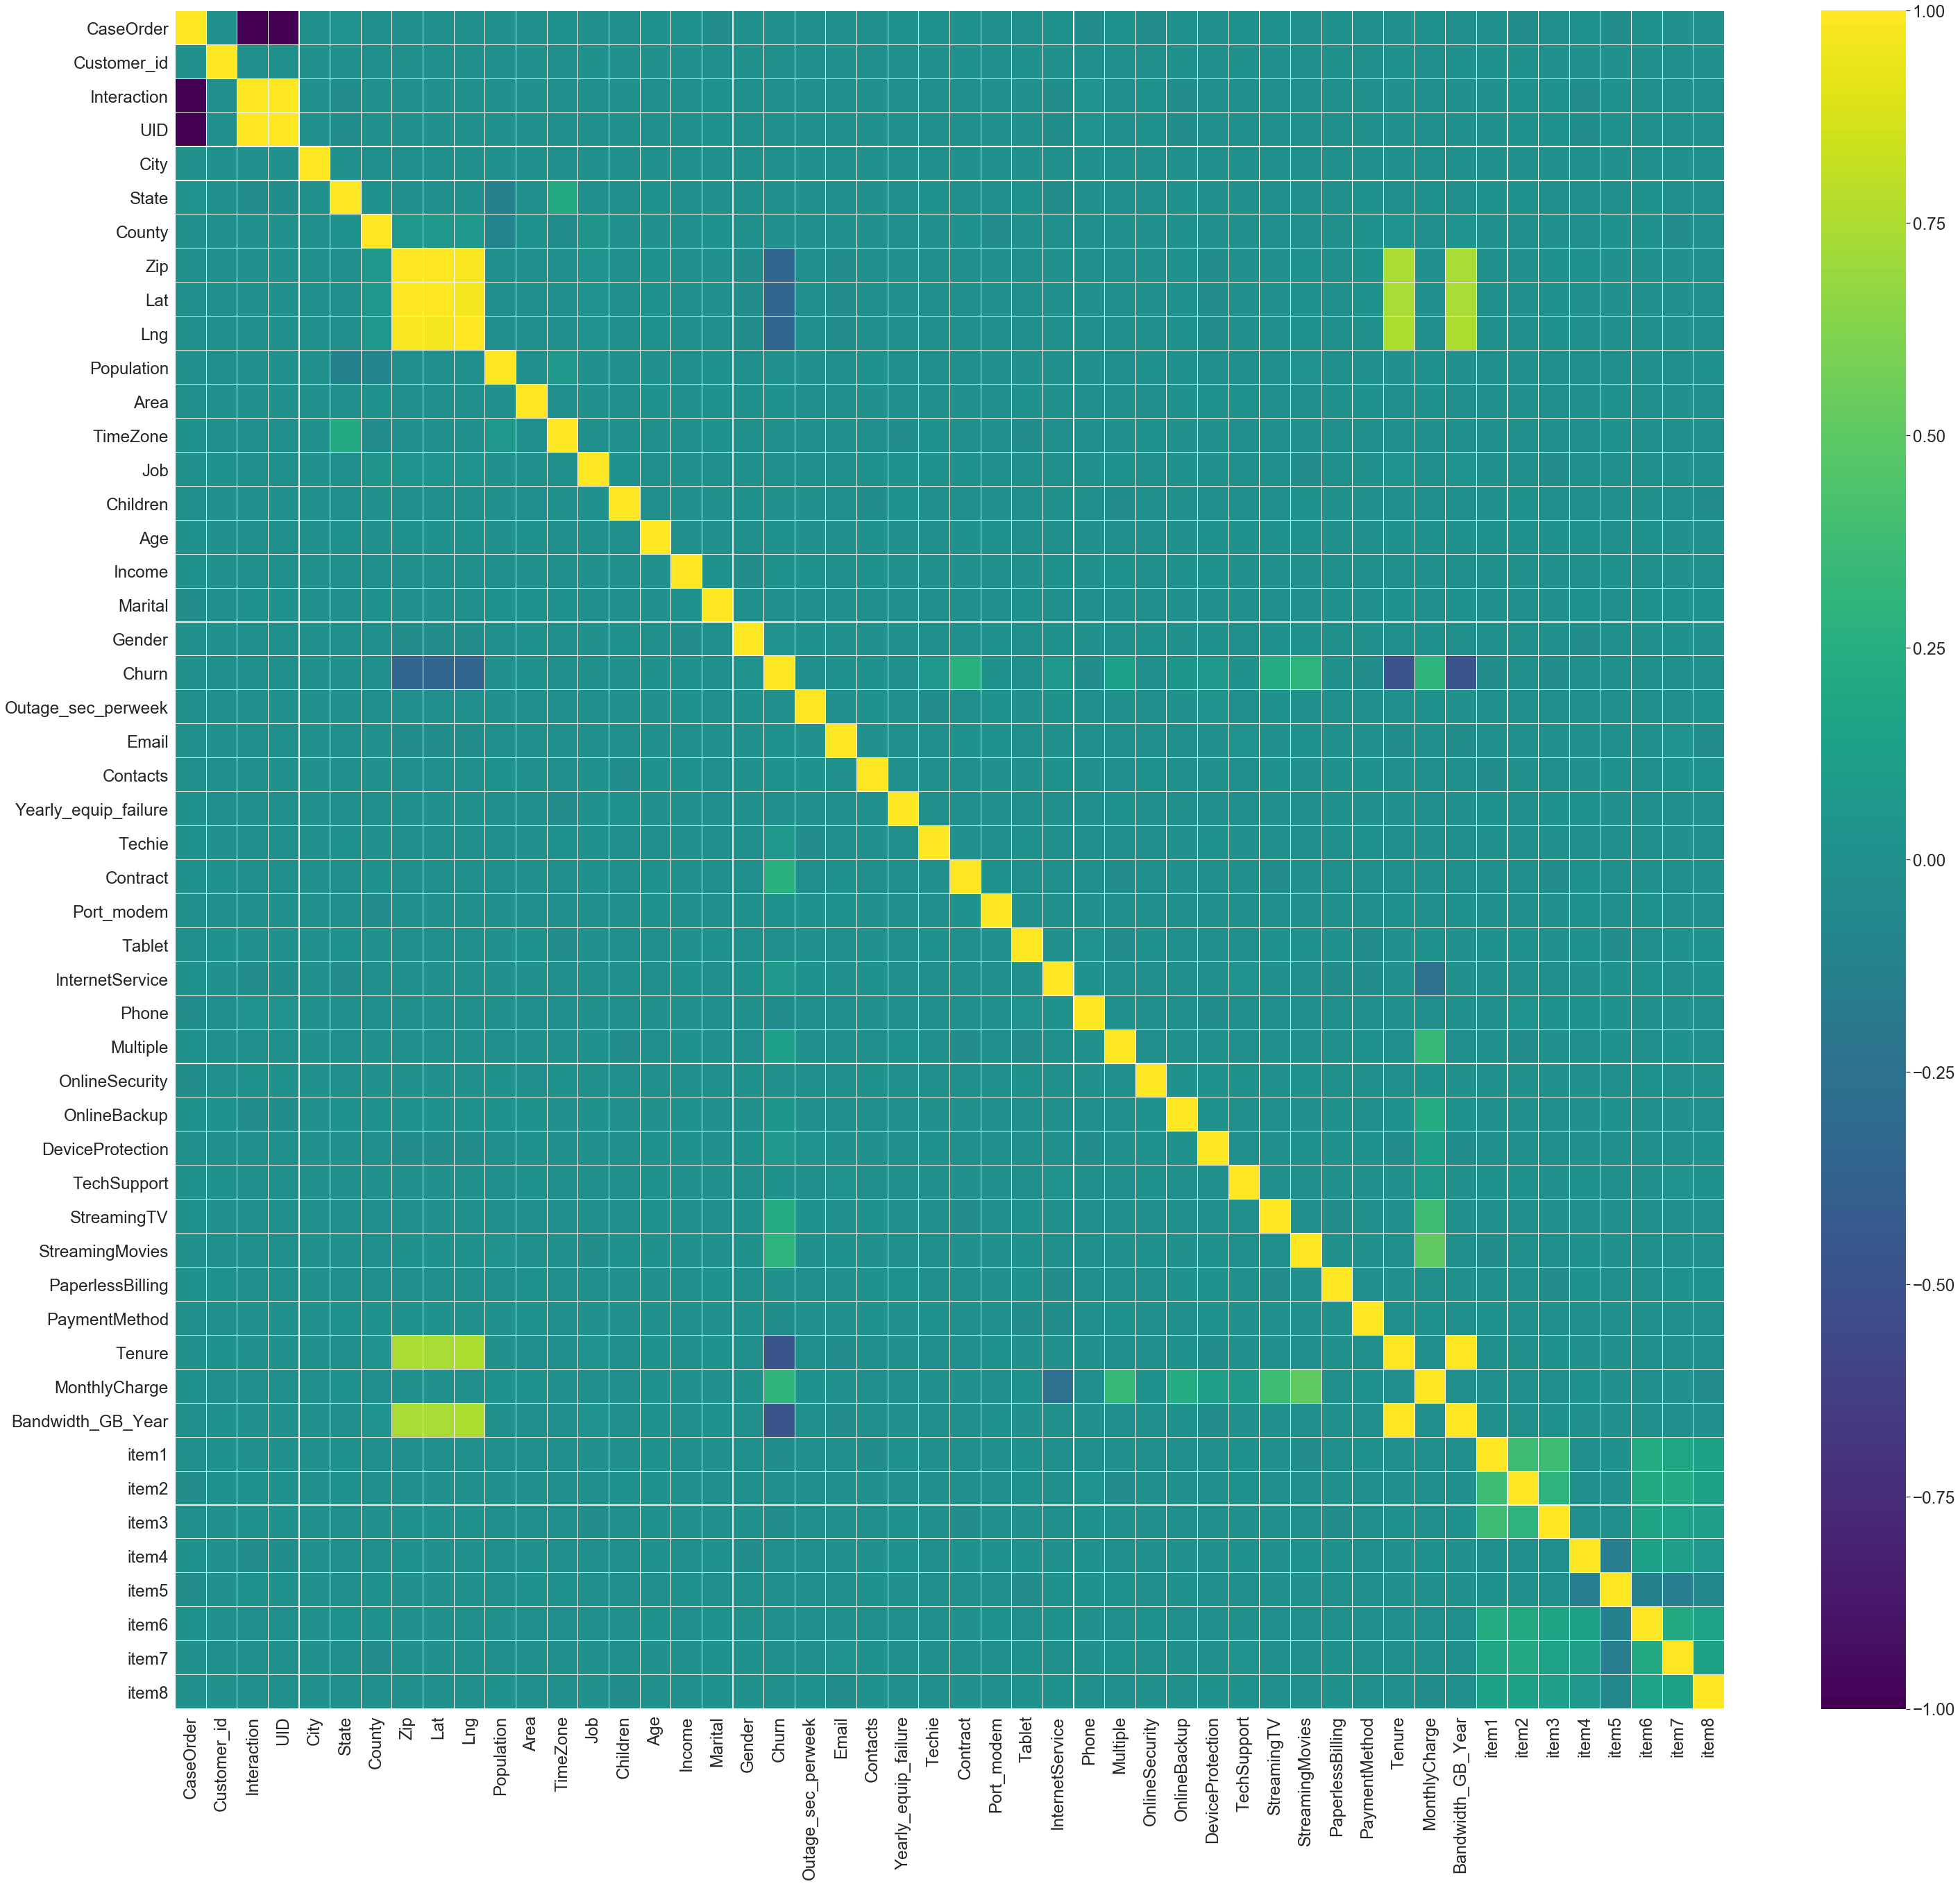

In [99]:
fig, ax = plt.subplots(figsize=(50, 45))
sns.heatmap(corr_matrix, cmap = 'viridis', linewidths = .1, label='big')
sns.set(font_scale=2.2)
plt.show();

In [100]:
df_corr = df[df.columns[0:100]].corr()['Churn'][:-1].sort_values()
df_corr.sort_values()

Tenure                 -4.722056e-01
Bandwidth_GB_Year      -4.699397e-01
Lng                    -3.484895e-01
Zip                    -3.449842e-01
Lat                    -3.416919e-01
Phone                  -2.629656e-02
PaymentMethod          -2.044219e-02
item3                  -1.971728e-02
item1                  -1.753668e-02
item7                  -1.490504e-02
County                 -1.395544e-02
OnlineSecurity         -1.353957e-02
Job                    -1.279765e-02
Outage_sec_perweek     -1.002418e-02
Marital                -8.040453e-03
item2                  -7.758320e-03
item6                  -7.074368e-03
item5                  -6.975402e-03
Yearly_equip_failure   -6.444189e-03
UID                    -5.891240e-03
Interaction            -5.891240e-03
Customer_id            -4.706202e-03
TimeZone               -2.956353e-03
Tablet                 -2.778734e-03
item4                  -1.671866e-03
City                    2.801586e-14
State                   2.787014e-04
P

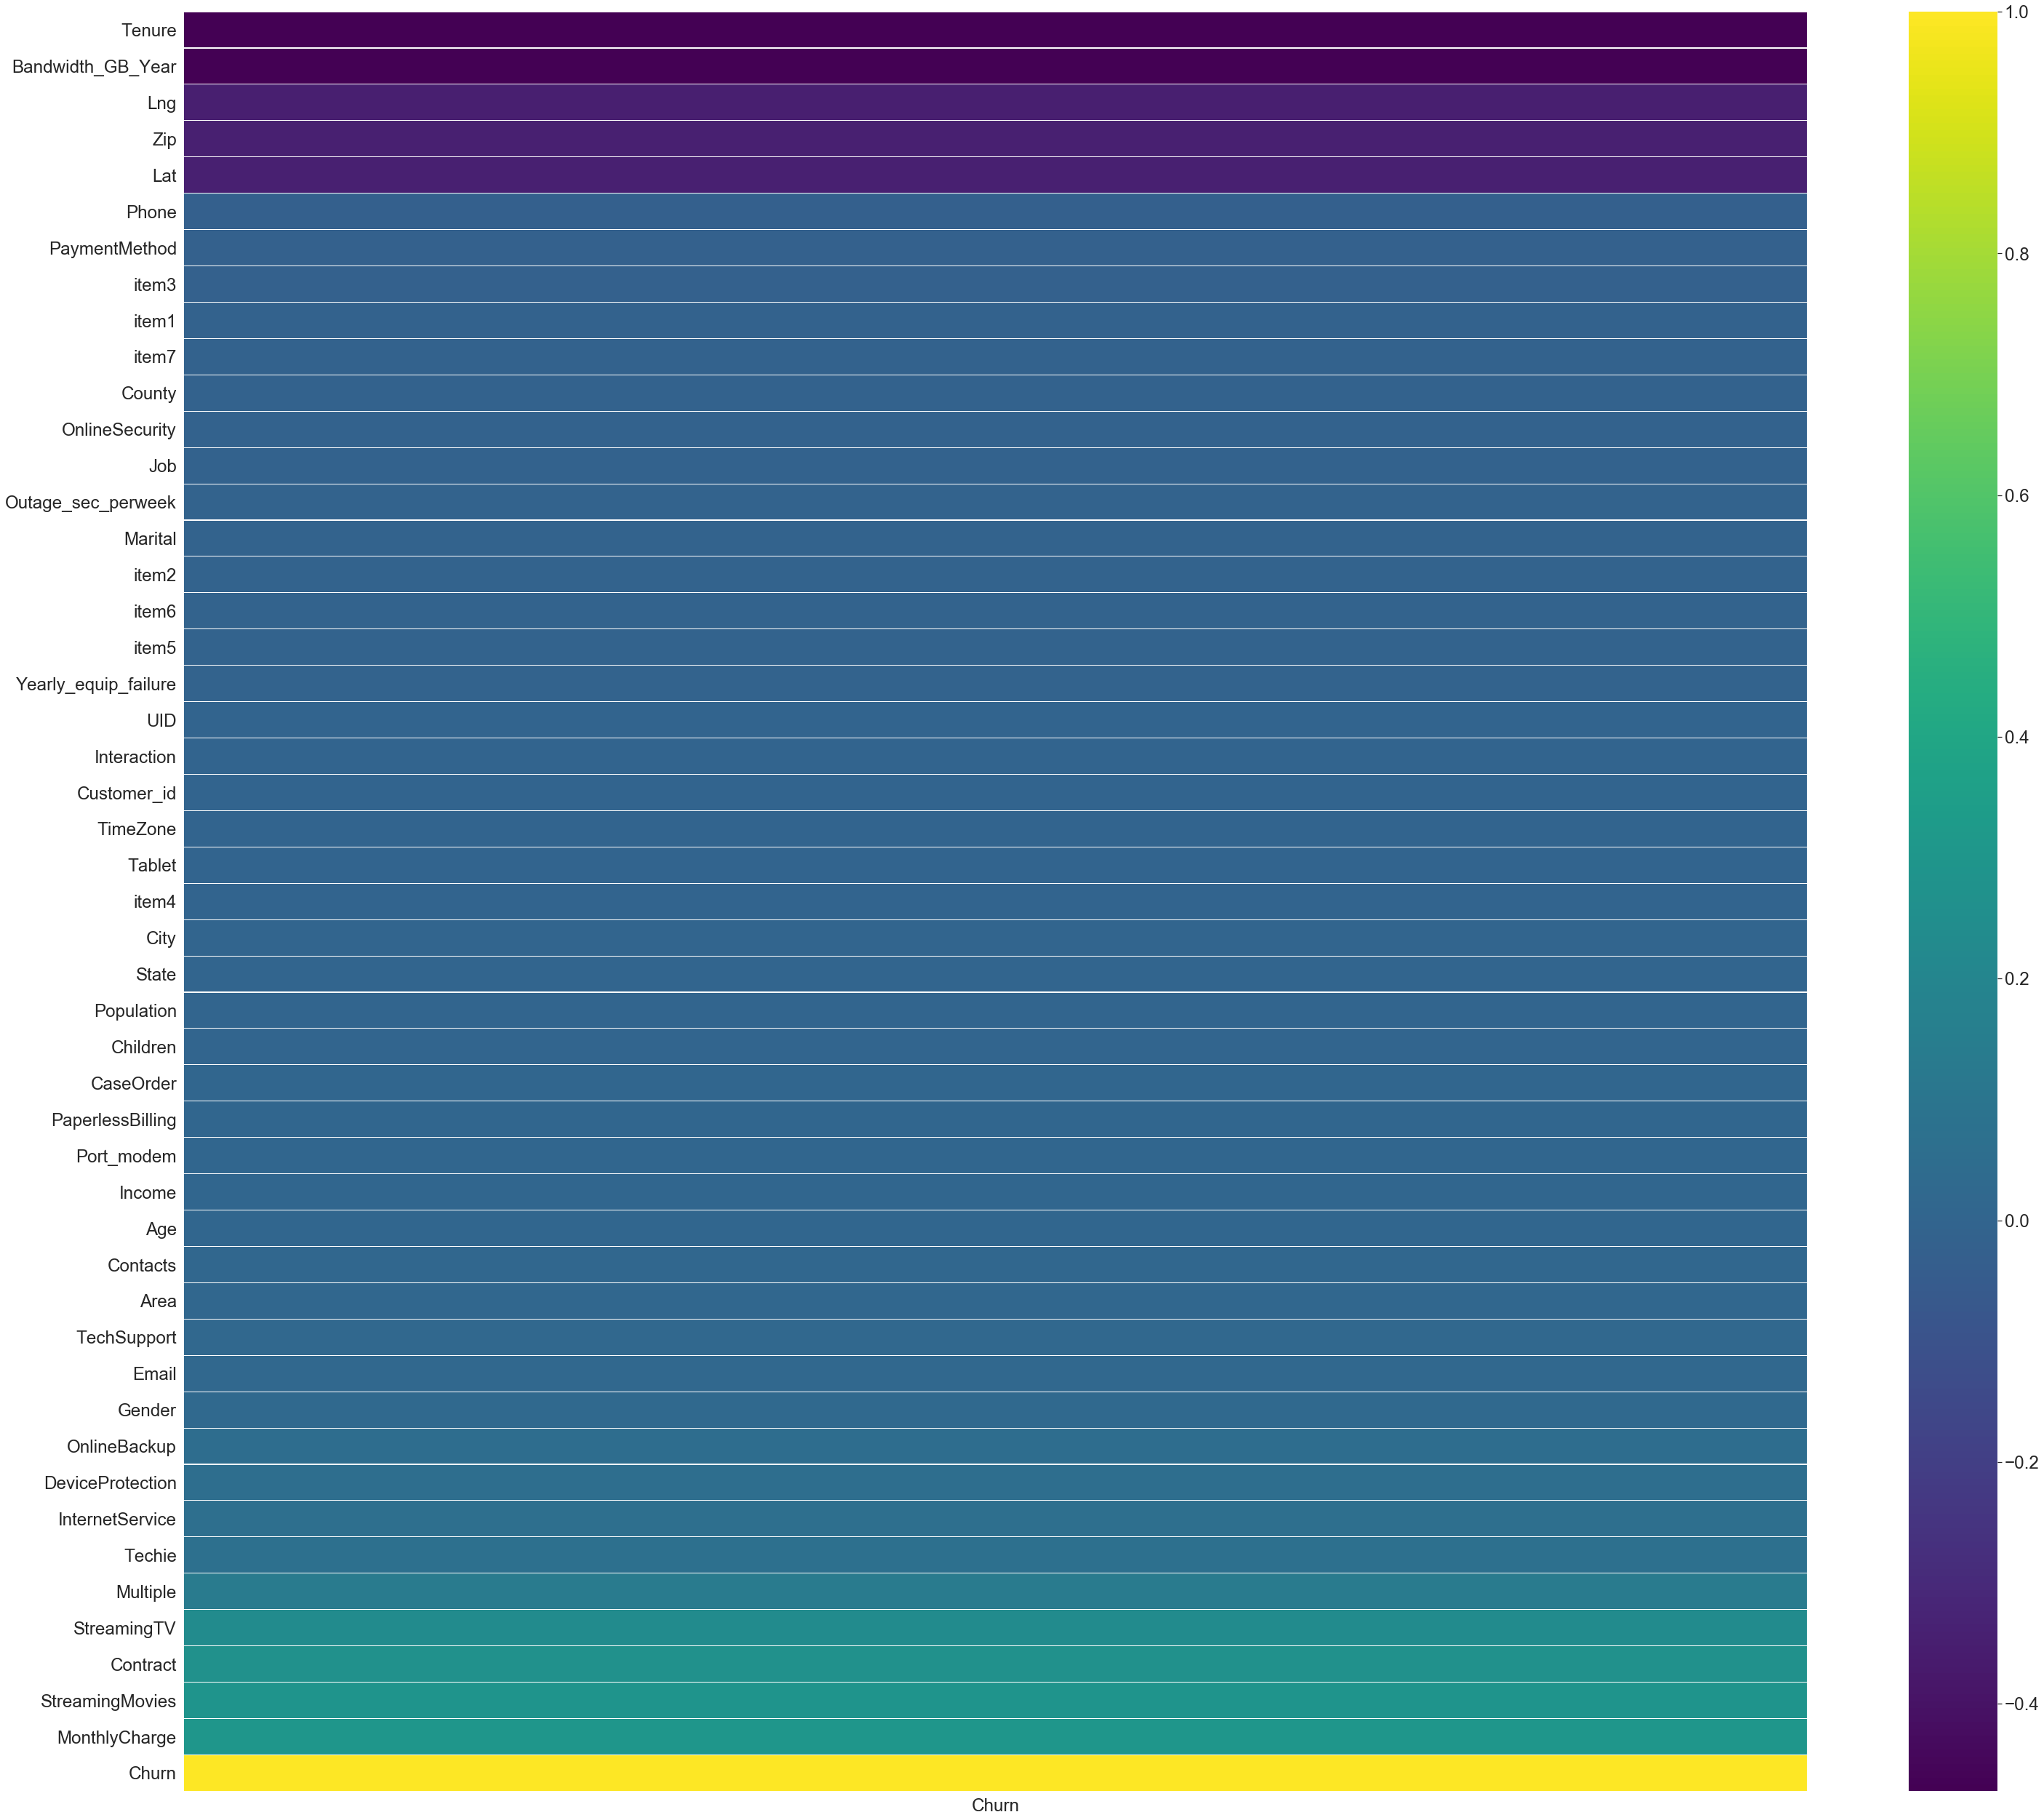

In [101]:
fig, ax = plt.subplots(figsize=(50, 45))
sns.heatmap(df_corr.to_frame(),cmap="viridis", label = 'small',linewidths = .1)
plt.show();

In [102]:
display('Accuracy Score:', metrics.accuracy_score(y_test, predictions))  

'Accuracy Score:'

0.871

In [103]:
ddff = df[['Churn','Tenure','Bandwidth_GB_Year','Lng','Zip','Lat','MonthlyCharge','StreamingMovies','Contract','StreamingTV']]
df_corr = ddff[ddff.columns[0:70]].corr()['Churn'][:].sort_values()
df_corr

Tenure              -0.472206
Bandwidth_GB_Year   -0.469940
Lng                 -0.348490
Zip                 -0.344984
Lat                 -0.341692
StreamingTV          0.230151
Contract             0.267653
StreamingMovies      0.289262
MonthlyCharge        0.300999
Churn                1.000000
Name: Churn, dtype: float64

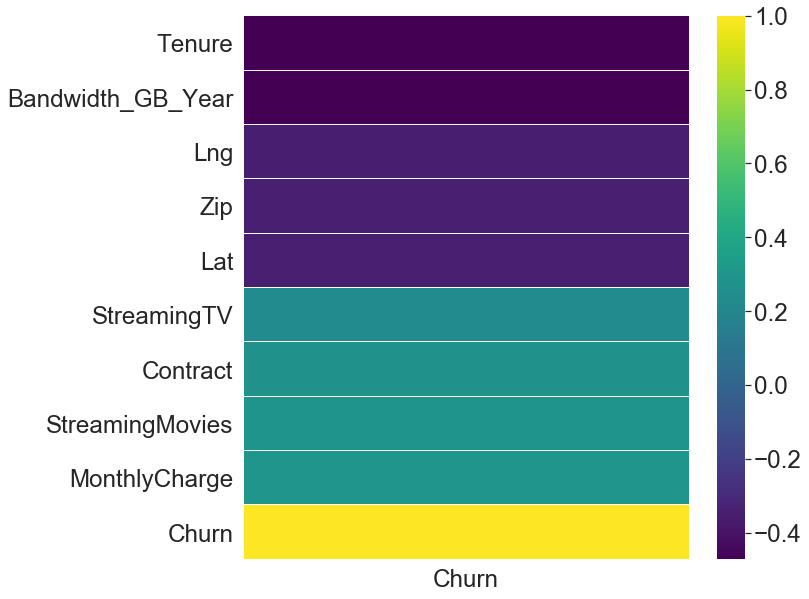

In [104]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr.to_frame(),cmap="viridis", label = 'small',linewidths = .1)
plt.show();

In [105]:
x = ddff.drop(['Churn'], axis=1) 
y = ddff['Churn']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state = 5)
L_model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(x_train, y_train)
predictions = L_model1.predict(x_test)
parameters = L_model1.get_params()
display(parameters)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': 0,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [106]:
display('y-int: \n', L_model1.intercept_)
display('Coefficients: \n', L_model1.coef_)

'y-int: \n'

array([-2.1148118])

'Coefficients: \n'

array([[-2.3308565 ,  0.093775  ,  0.54885835, -1.19489265,  0.7218832 ,
         0.48993812,  1.12257642,  1.31118283,  0.9466806 ]])

In [107]:
logit_model=sm.MNLogit(y_train,sm.add_constant(x_train))
logit_model
result=logit_model.fit()
s1=result.summary()
s2=result.summary2()
display(s1)
display(s2)

Optimization terminated successfully.
         Current function value: 0.279282
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 8000
Model:                        MNLogit   Df Residuals:                     7990
Method:                           MLE   Df Model:                            9
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                  0.5142
Time:                        19:51:09   Log-Likelihood:                -2234.3
converged:                       True   LL-Null:                       -4599.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
          Churn=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.2296      0.124    -34.229      0.000      -4.472      -3.987
Tenure               -4.6617      0.889     -5.241      0.000      -6.405      -2.918
Bandwidth_GB_Year     0.1876      0.881      0.213      0.831      -1.539       1.914
Lng                   1.0977      0.435      2.521      0.012       0.244       1.951
Zip                  -2.3898      1.258     -1.900      0.057      -4.855       0.075
Lat                   1.4438      1.184      1.220      0.223      -0.877       3.764
MonthlyCharge         0.9799      0.098      9.992      0.000       0.788       1.172
StreamingMovies       2.2452      0.099     22.641      0.000       2.051       2.440
Contract              2.6224      0.095     27.684      0.000       2.437       2.808
StreamingTV           1.8934      0.092     20.610      0.000       1.713       2.073
=====================================================================================
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: MNLogit
==================================================================
Model:                MNLogit          Pseudo R-squared: 0.514    
Dependent Variable:   Churn            AIC:              4488.5162
Date:                 2020-11-24 19:51 BIC:              4558.3881
No. Observations:     8000             Log-Likelihood:   -2234.3  
Df Model:             9                LL-Null:          -4599.0  
Df Residuals:         7990             LLR p-value:      0.0000   
Converged:            1.0000           Scale:            1.0000   
No. Iterations:       8.0000                                      
------------------------------------------------------------------
    Churn = 0      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
            const -4.2296   0.1236 -34.2286 0.0000 -4.4718 -3.9874
           Tenure -4.6617   0.8895  -5.2409 0.0000 -6.4051 -2.9184
Bandwidth_GB_Year  0.1876   0.8808   0.2129 0.8314 -1.5388  1.9139
              Lng  1.0977   0.4354   2.5210 0.0117  0.2443  1.9511
              Zip -2.3898   1.2578  -1.9000 0.0574 -4.8551  0.0755
              Lat  1.4438   1.1839   1.2195 0.2226 -0.8766  3.7641
    MonthlyCharge  0.9799   0.0981   9.9918 0.0000  0.7877  1.1721
  StreamingMovies  2.2452   0.0992  22.6413 0.0000  2.0508  2.4395
         Contract  2.6224   0.0947  27.6835 0.0000  2.4367  2.8080
      StreamingTV  1.8934   0.0919  20.6100 0.0000  1.7133  2.0734
==================================================================

"""

In [108]:
display('Accuracy Score:', metrics.accuracy_score(y_test, predictions))  

'Accuracy Score:'

0.8695

In [109]:
logit = LogisticRegression(random_state= 0)
logit.fit(x_train, y_train)

y_predicted = logit.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[1332  112]
 [ 145  411]]


In [118]:
ddff.to_csv('fully_prepared_data.csv', sep=',')
def create_download_link( ddff, title = "Download CSV file", filename = "fully_prepared_data.csv"):
    csv = ddff.to_csv(index = False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(ddff)